In [5]:
# Plot NA^2 terms 

import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
import sys
sys.path.append("../CommonUtils/")
import CommonUtils as cu

fs=14

From Saskia's thesis p.39
$$ y = \frac{p}{p_{\rm{max}}}  $$
$$ N(y) = \frac{1}{3}(y-1)(4y^2-5y-5)  $$
$$ A_{g-2}(y) = \frac{-8y^2+y+1}{4y^2-5y-5} $$
$$ A_{\rm{EDM}} = \frac{\sqrt{y(1-y)}(1+4y)}{5+5y-4y^2} $$

In [35]:
y = np.linspace(0, 1, 100) 

def N(y):
    return 1/3*(y-1)**2*(-y**2+y+3)
#     return 1/3*(y-1)*(4*y**2-5*y-5)
#     return 2*y*(3-2*y)

def A_gm2(y):
    return 0.66*(y*(2*y+1))/(-y*2+y+3)
#     return (-8*y**2+y+1)/(4*y**2-5*y-5)
#     return (2*y-1)/(3-2*y)

def A_edm(y):
    return ( np.sqrt(y*(1-y))*(1+4*y)  ) / ( 5+5*y-4*y**2  ) 

def NA2_gm2(y):
    return 42.5*(N(y)*A_gm2(y)*A_gm2(y))

def NA2_edm(y):
#     return 60*N(y)*A_edm(y)**2
    return 4*( y*(1-y)**2 * (1+4*y)**2 ) / ( 5 + 5*y - 4*y**2 )
      



No plot style specified, returning a nicely formatted axis only: use it e.g. 'ax.plot()'


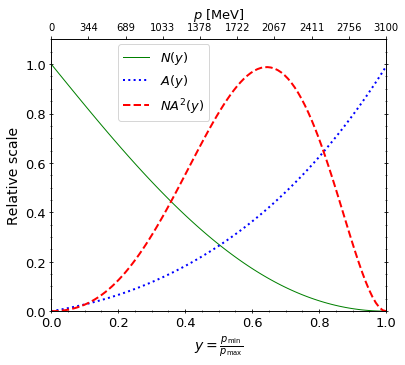

In [36]:
fig, ax = cu.plot(y, N(y), figsize=(6,5), label=r"$N(y)$")
ax.plot(y, N(y), c="g", ls="-", label=r"$N(y)$", lw=1);
ax.plot(y, A_gm2(y), c="b", ls=":", label=r"$A(y)$", lw=2);
ax.plot(y, NA2_gm2(y), c="r", ls="--", label=r"$NA^2(y)$", lw=2);
legend=ax.legend(fontsize=fs-1, loc=(0.2,0.7));
ax2 = ax.twiny()
mom=np.linspace(0,3100, 10)
ax2.set_xticks(mom);
ax2.set_xlabel(r"$p$ [MeV]", fontsize=fs-1)
ax.set_xlim(0, 1);
ax.set_ylim(0, 1.1);
# ax.plot( (0, 1), (0, 0), c="k", ls="-", lw=0.5)
ax.set_ylabel("Relative scale")
ax.set_xlabel(r"$y=\frac{p_{\rm{min}}}{p_{\rm{max}}}$");
fig.subplots_adjust=1
fig.savefig("../fig/Asym_gm2.png", bbox_extra_artists=(legend,), bbox_inches='tight', dpi=300)

No plot style specified, returning a nicely formatted axis only: use it e.g. 'ax.plot()'


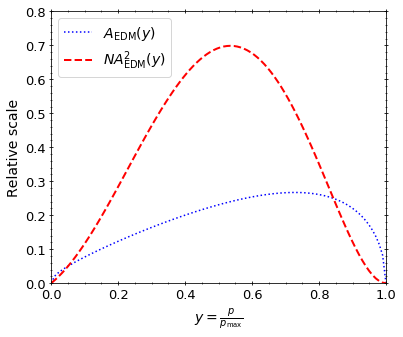

In [38]:
fig, ax = cu.plot(y, N(y), figsize=(6,5), lw=0, label=None)
ax.plot(y, A_edm(y), c="b", ls=":", label=r"$A_{\rm{EDM}}(y)$");
ax.plot(y, NA2_edm(y), c="r", ls="--", label=r"$NA^2_{\rm{EDM}}(y)$", lw=2);
ax.legend(fontsize=fs);
ax.set_xlim(0, 1);
ax.set_ylim(0, 0.8)
ax.set_ylabel("Relative scale")
ax.set_xlabel(r"$y=\frac{p}{p_{\rm{max}}}$");
fig.savefig("../fig/Asym_EDM.png",bbox_extra_artists=(legend,), bbox_inches='tight', dpi=300)